In [1]:
from glob import glob
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as sc
from scipy.optimize import curve_fit
from scipy.stats import chi2

### 4.2.1 Dark Current

In [2]:
all_dark_fits = glob("./DarkMeasurements/dark*.fits")

In [3]:
temperatures = []

for path in all_dark_fits:
    hdul = fits.open(path)
    #hdul.info()
    temperatures.append(hdul[0].header['CCDTEMP'])
    image = hdul[0].data
    print("Opening image ", path)
    print("Dimension of data: ", image.shape)
    overscan_region = image[:,1030:]
    print('Dimension of or: ', overscan_region.shape)
    #rint("Printing original image:")
    #print(image)
    #rint("Printing overscan region")
    #rint(overscan_region)
    
    median_bias = np.median(overscan_region)
    std_bias = np.std(overscan_region)
    print(median_bias)
    print(std_bias)
    
    corrected_image = image - median_bias
    print(corrected_image)
    fits.writeto("./DarkMeasurements/BiasCorrected/" +path[18:28] + "_bias_corrected" + path[28:], corrected_image, overwrite=True)

Opening image  ./DarkMeasurements\dark_0000.fits
Dimension of data:  (1024, 1050)
Dimension of or:  (1024, 20)
3782.0
53.25095310128325
[[  -89. -3260. -2147. ...    68.    74.    95.]
 [ 3304.   329.  1144. ...    70.    45.    91.]
 [ 3247.   370.  1112. ...    52.    64.   110.]
 ...
 [ 2223.  -347.   455. ...    97.   123.   153.]
 [ 2231.  -365.   458. ...    85.    68.   109.]
 [ 2125.  -323.   415. ...   103.    95.   118.]]
Opening image  ./DarkMeasurements\dark_0001.fits
Dimension of data:  (1024, 1050)
Dimension of or:  (1024, 20)
3797.0
44.90229490475116
[[ -662. -3661. -2613. ...    44.    87.    64.]
 [ 3087.   155.   960. ...    21.    90.    37.]
 [ 3058.   230.   894. ...    32.    73.    78.]
 ...
 [ 2036.  -356.   368. ...    55.   111.    84.]
 [ 2058.  -371.   343. ...    67.   119.    88.]
 [ 2072.  -341.   312. ...    60.   111.    93.]]
Opening image  ./DarkMeasurements\dark_0002.fits
Dimension of data:  (1024, 1050)
Dimension of or:  (1024, 20)
3805.0
40.1271445

Opening image  ./DarkMeasurements\dark_0020.fits
Dimension of data:  (1024, 1050)
Dimension of or:  (1024, 20)
3874.0
27.664465231884787
[[1973. -596.   71. ...   -7.  -36.   46.]
 [1451. -585.   69. ...    0.  -22.    2.]
 [1445. -562.   52. ...  -18.  -49.   26.]
 ...
 [1439. -567.   46. ...    7.  -12.   10.]
 [1435. -562.   75. ...    2.  -16.    8.]
 [1421. -540.   63. ...   26.  -28.   40.]]
Opening image  ./DarkMeasurements\dark_0021.fits
Dimension of data:  (1024, 1050)
Dimension of or:  (1024, 20)
3874.0
27.655223921195333
[[ 2.077e+03 -5.430e+02  1.330e+02 ... -1.200e+01 -7.600e+01  8.000e+00]
 [ 1.481e+03 -5.530e+02  7.300e+01 ... -4.000e+00 -1.100e+01  0.000e+00]
 [ 1.484e+03 -5.320e+02  6.300e+01 ...  2.000e+00 -2.200e+01  1.200e+01]
 ...
 [ 1.480e+03 -5.380e+02  4.800e+01 ...  2.900e+01 -3.800e+01  4.900e+01]
 [ 1.460e+03 -5.640e+02  5.400e+01 ...  1.000e+00  2.100e+01  6.400e+01]
 [ 1.450e+03 -5.830e+02  4.900e+01 ...  2.000e+00 -2.500e+01  2.700e+01]]
Opening image  ./D

3871.0
28.45279480475981
[[ 1.957e+03 -5.380e+02  1.140e+02 ... -2.800e+01 -1.100e+01  0.000e+00]
 [ 1.288e+03 -5.600e+02  2.600e+01 ... -7.000e+00 -4.600e+01  3.700e+01]
 [ 1.280e+03 -5.590e+02 -9.000e+00 ... -5.400e+01 -4.500e+01  3.200e+01]
 ...
 [ 1.313e+03 -5.370e+02  4.400e+01 ... -7.000e+00  8.000e+00  4.000e+01]
 [ 1.307e+03 -5.370e+02  3.400e+01 ...  1.000e+00 -4.100e+01  4.800e+01]
 [ 1.323e+03 -5.280e+02  1.200e+01 ... -2.700e+01  0.000e+00  4.000e+01]]
Opening image  ./DarkMeasurements\dark_0042.fits
Dimension of data:  (1024, 1050)
Dimension of or:  (1024, 20)
3870.0
28.670240104235038
[[ 1.859e+03 -5.260e+02  9.600e+01 ... -1.700e+01 -3.500e+01  1.000e+01]
 [ 1.288e+03 -5.500e+02 -1.200e+01 ... -1.300e+01 -2.100e+01  0.000e+00]
 [ 1.294e+03 -5.640e+02 -3.000e+00 ... -4.300e+01 -3.200e+01  2.400e+01]
 ...
 [ 1.333e+03 -5.180e+02  4.900e+01 ... -1.000e+00 -5.000e+00  1.200e+01]
 [ 1.331e+03 -5.510e+02  5.400e+01 ...  7.000e+00 -1.800e+01  3.700e+01]
 [ 1.365e+03 -5.690e+02 

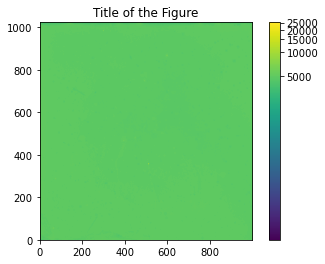

In [4]:
from astropy.visualization import simple_norm

hdul = fits.open(all_dark_fits[0])
#hdul.info()
image = hdul[0].data

norm = simple_norm(image,'log', percent=100)
fig, ax = plt.subplots()
ax.set_title("Title of the Figure")
im = ax.imshow(image[:,:1000] , norm=norm , origin="lower", cmap="viridis")
fig.colorbar(im, ax=ax)

In [5]:
all_bc_dark_fits = glob("./DarkMeasurements/BiasCorrected/dark*_bias_corrected.fits")

In [6]:
dark_medians = []
dark_errors = []

for path in all_bc_dark_fits:
    hdul = fits.open(path)
    image = hdul[0].data
    median_dark = np.median(image[:,:1000])
    std_dark = np.std(image[:,:1000])
    dark_medians.append(median_dark)
    dark_errors.append(std_dark)
    
print(dark_medians)
print(dark_errors)

def dark_current(T, A, Eg):
    return A * T**(3/2) * np.exp(-Eg / (2*(sc.k/sc.e)*T))

[1092.0, 917.0, 774.0, 655.0, 553.0, 468.0, 396.0, 334.0, 282.0, 236.0, 199.0, 172.0, 141.0, 122.0, 103.0, 87.0, 70.0, 60.0, 52.0, 42.0, 35.0, 29.0, 24.0, 22.0, 15.0, 16.0, 9.0, 8.0, 9.0, 4.0, 6.0, 1.0, 1.0, 1.0, -1.0, -1.0, 0.0, -1.0, -2.0, -1.0, 0.0, -2.0, -2.0, 0.0, -2.0, -3.0, -4.0, -2.0, -4.0, -4.0, 0.0, -4.0, -3.0, 0.0, -3.0, -4.0, -3.0, -1.0]
[167.62205253313485, 148.3210047774509, 132.55600136669625, 118.97866467526819, 107.9238990492986, 98.87478435198345, 91.37581993868389, 85.34105270144768, 80.73087885385155, 76.62794665892136, 73.03328396012415, 70.30873476978839, 68.24328126606468, 66.34052088608408, 64.73545628401504, 63.54929021966982, 62.37007412740471, 61.859362548300346, 60.51055993951883, 60.40466288571647, 59.77445125010424, 59.25048756687234, 58.72645016329476, 57.82503467107506, 57.69602814477404, 57.186106598417936, 56.88914512799846, 57.200568906260536, 56.526677330609886, 56.195558324438494, 56.00833950128818, 55.74660207263069, 56.114404542333176, 55.99414609

35.0
21.952626649839065
Eg =  1.3820694727638976 +- 0.009156622673609597


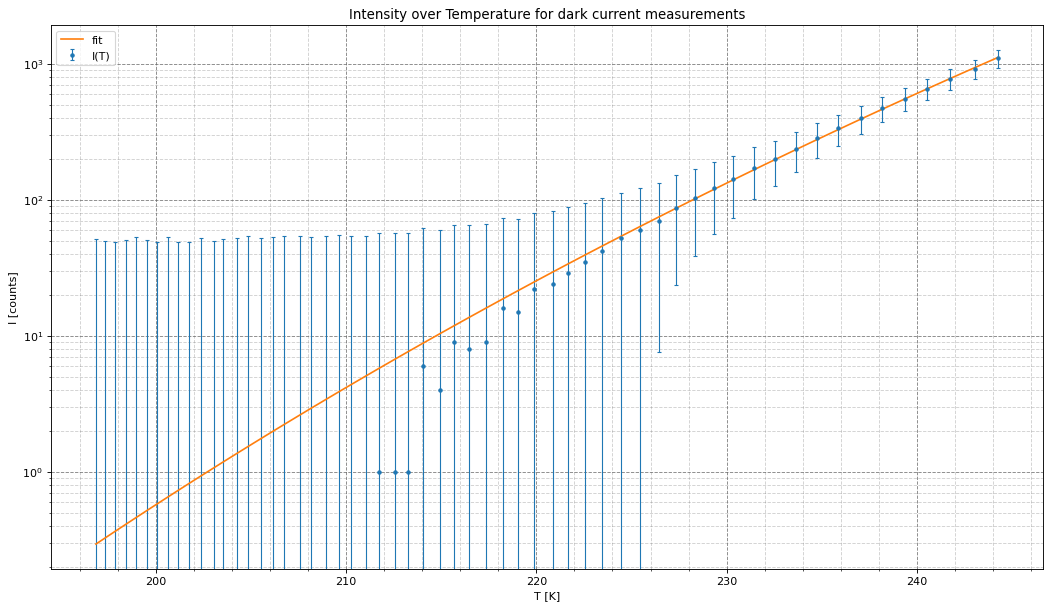

In [7]:
temperatures_np = np.asarray(temperatures)
temperatures_np = temperatures_np + 273.15

#for i in range(len(dark_medians)):
    #if dark_medians[i] <= 0:
        #dark_medians[i] = 10**(-6)
print(dark_medians[20])
print(dark_current(220, 100000000000, 1.15))
popt_dc, pcov_dc = curve_fit(dark_current, temperatures_np, dark_medians, sigma=dark_errors, p0=[100000000000, 1.15])

plt.figure(figsize=(16, 9), dpi=80)
plt.errorbar(temperatures_np,dark_medians, yerr = dark_errors, linestyle='None', marker = ".", label="I(T)", capsize = 2, elinewidth=1)
plt.plot(temperatures_np, dark_current(temperatures_np, *popt_dc), label="fit")
#plt.plot(temperatures_np, dark_current(temperatures_np, 100000000000, 1.15))
plt.xlabel('T [K]')
plt.ylabel('I [counts]')
plt.title('Intensity over Temperature for dark current measurements')
plt.yscale('log')
plt.legend()
plt.grid(b=True, which='major', color='#666666', linestyle='--', alpha = 0.8)
plt.grid(b=True, which='minor', color='#666666', linestyle='--', alpha = 0.3)
plt.minorticks_on()

print("Eg = ", popt_dc[1], "+-", np.sqrt(pcov_dc[1,1]))

### 4.2.2 Flat-field

In [8]:
flats_B = glob("./FlatFieldMeasurements/flats_B*.fits")
flats_R = glob("./FlatFieldMeasurements/flats_R*.fits")
flats_V = glob("./FlatFieldMeasurements/flats_V*.fits")
flats_paths = [flats_B, flats_R, flats_V]
print(flats_paths)

[['./FlatFieldMeasurements\\flats_B0000.fits', './FlatFieldMeasurements\\flats_B0001.fits', './FlatFieldMeasurements\\flats_B0002.fits', './FlatFieldMeasurements\\flats_B0003.fits', './FlatFieldMeasurements\\flats_B0004.fits'], ['./FlatFieldMeasurements\\flats_R0000.fits', './FlatFieldMeasurements\\flats_R0001.fits', './FlatFieldMeasurements\\flats_R0002.fits', './FlatFieldMeasurements\\flats_R0003.fits', './FlatFieldMeasurements\\flats_R0004.fits'], ['./FlatFieldMeasurements\\flats_V0000.fits', './FlatFieldMeasurements\\flats_V0001.fits', './FlatFieldMeasurements\\flats_V0002.fits', './FlatFieldMeasurements\\flats_V0003.fits', './FlatFieldMeasurements\\flats_V0004.fits']]


2498.0
442.11356911059056
2493.0
439.7041839985691
2493.0
442.3693390601564
2478.0
444.3148681859872
2481.0
446.11378803523905
2498.0
431.87922458407263
2501.0
430.73624141299683
2495.0
432.6715360976795
2501.0
431.0702909427765
2502.5
432.5587824524619
2629.0
394.23030053230065
2629.0
394.06442730570416
2630.0
395.66718611668097
2627.0
396.8513260878901
2629.0
395.6001220532741


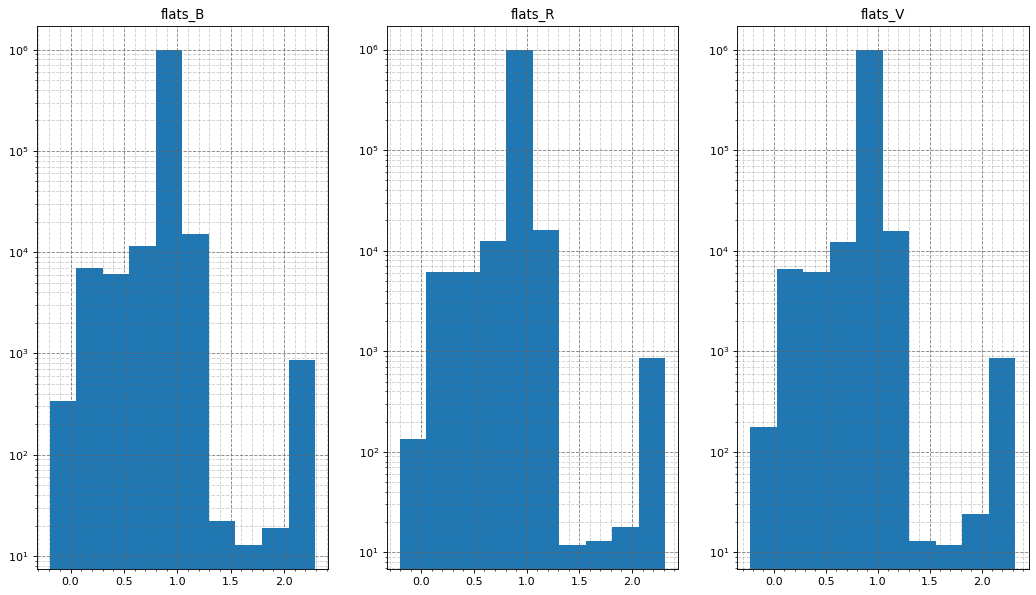

In [9]:
plt.figure(figsize=(16,9), dpi=80)

i = 0
for pathlist in flats_paths:
    corrected_images = []
    for path in pathlist:
        hdul = fits.open(path)
        image = hdul[0].data
        overscan_region = image[:,1030:]

        median_bias = np.median(overscan_region)
        std_bias = np.std(overscan_region)
        print(median_bias)
        print(std_bias)
        
        corrected_image = image - median_bias
        corrected_images.append(corrected_image)
    
    corrected_images_np = np.asarray(corrected_images)
    master_image = np.median(corrected_images_np[:,:,:1000], axis=0)
    master_median = np.median(master_image)
    master_image_normalized = master_image / master_median
    plt.subplot(1, 3, i+1)
    counts, bins = np.histogram(master_image_normalized.flatten())
    #plt.bar(counts, bins)
    plt.title(pathlist[0][24:31])
    plt.grid(b=True, which='major', color='#666666', linestyle='--', alpha = 0.8)
    plt.grid(b=True, which='minor', color='#666666', linestyle='--', alpha = 0.3)
    plt.minorticks_on()
    plt.yscale('log')
    plt.hist(bins[:-1], bins, weights=counts)
    
    i+=1

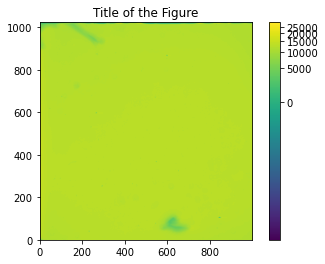

In [10]:
hdul = fits.open(flats_B[0])
#hdul.info()
image = hdul[0].data
overscan_region = image[:,1030:]

median_bias = np.median(overscan_region)
image = image - median_bias

norm = simple_norm(image,'log', percent=100)
fig, ax = plt.subplots()
ax.set_title("Title of the Figure")
im = ax.imshow(image[:,:1000] , norm=norm , origin="lower", cmap="viridis")
fig.colorbar(im, ax=ax)

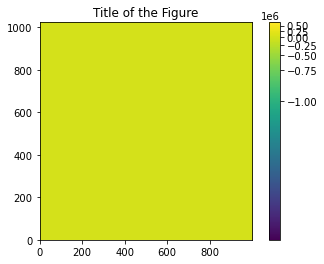

In [11]:
hdul = fits.open(flats_B[0])
#hdul.info()
image = hdul[0].data
overscan_region = image[:,1030:]

median_bias = np.median(overscan_region)
corrected_image = image - median_bias
image = corrected_image[:,:1000] / master_image_normalized

norm = simple_norm(image,'log', percent=100)
fig, ax = plt.subplots()
ax.set_title("Title of the Figure")
im = ax.imshow(image[:,:1000] , norm=norm , origin="lower", cmap="viridis")
fig.colorbar(im, ax=ax)

### 4.3.3 Linearity

In [12]:
linearity_paths = glob("./LinearityMeasurements/*.fits")

In [13]:
exposure_times = []
median_lin = []
median_lin_err = []

for path in linearity_paths:
    hdul = fits.open(path)
    image = hdul[0].data
    overscan_region = image[:,1030:]

    median_bias = np.median(overscan_region)
    std_bias = np.std(overscan_region)
    corrected_image = image[:,:1000] - median_bias
    image_noflat = corrected_image / master_image_normalized
    
    median_lin.append(np.median(image_noflat))
    median_lin_err.append(np.std(image_noflat))
    
    exposure_times.append(hdul[0].header['EXPTIME'])

[3852.28118543  -69.35499008]
[[  39.90832954 -140.11981062]
 [-140.11981062  556.4439481 ]]
chi2= 0.14675660850093716
chi2_red= 0.013341509863721561
P= 100.0


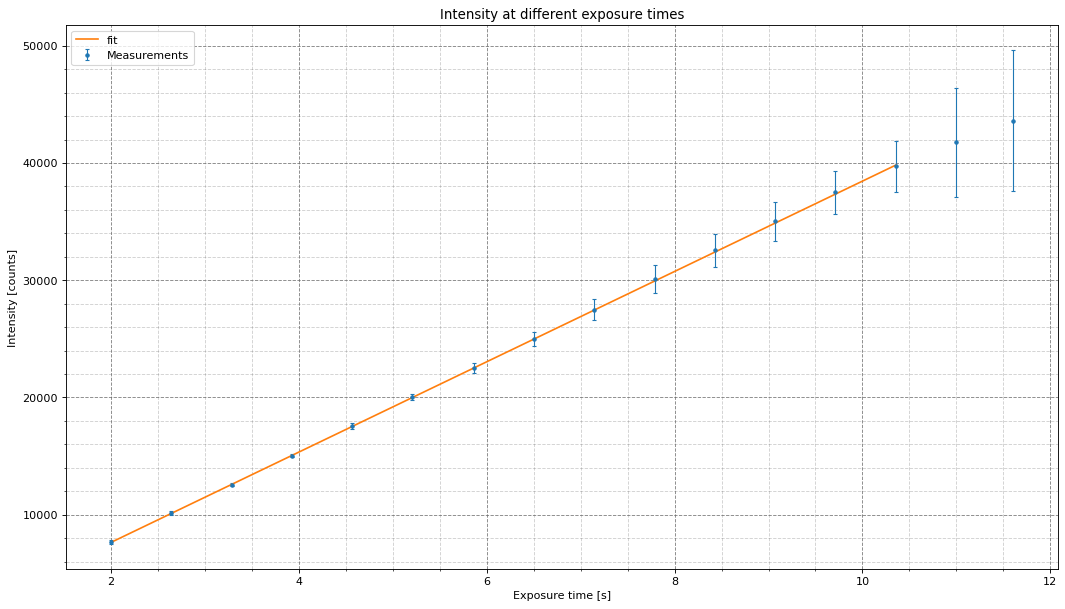

In [14]:
def linearfun(x,s,b):
    return s*x + b

exposure_times = np.asarray(exposure_times)
median_lin = np.asarray(median_lin)
median_lin_err = np.asarray(median_lin_err)

popt_lin, pcov_lin = curve_fit(linearfun, exposure_times[:-2], median_lin[:-2], sigma=median_lin_err[:-2])
print(popt_lin)
print(pcov_lin)

chi2_val=np.sum((linearfun(exposure_times[:-2],*popt_lin)-median_lin[:-2])**2/median_lin_err[:-2]**2)
dof=len(exposure_times[:-2])-3 #dof:degrees of freedom, Freiheitsgrad
chi2_red=chi2_val/dof
prob=round(1-chi2.cdf(chi2_val,dof),2)*100
print("chi2=", chi2_val)
print("chi2_red=",chi2_red)
print("P=", prob)

plt.figure(figsize=(16, 9), dpi=80)
plt.errorbar(exposure_times,median_lin, yerr = median_lin_err, linestyle='None', marker = ".", label="Measurements", capsize = 2, elinewidth=1)
plt.plot(exposure_times[:-2], linearfun(exposure_times[:-2], *popt_lin), label='fit')
plt.xlabel('Exposure time [s]')
plt.ylabel('Intensity [counts]')
plt.title('Intensity at different exposure times')
#plt.yscale('log')
plt.legend()
plt.grid(b=True, which='major', color='#666666', linestyle='--', alpha = 0.8)
plt.grid(b=True, which='minor', color='#666666', linestyle='--', alpha = 0.3)
plt.minorticks_on()

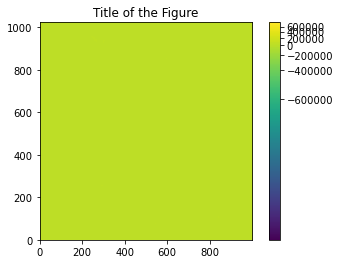

In [15]:
hdul = fits.open(linearity_paths[12])
#hdul.info()
image = hdul[0].data
overscan_region = image[:,1030:]

median_bias = np.median(overscan_region)
corrected_image = image - median_bias
image = corrected_image[:,:1000] / master_image_normalized

norm = simple_norm(image,'log', percent=100)
fig, ax = plt.subplots()
ax.set_title("Title of the Figure")
im = ax.imshow(image[:,:1000] , norm=norm , origin="lower", cmap="viridis")
fig.colorbar(im, ax=ax)

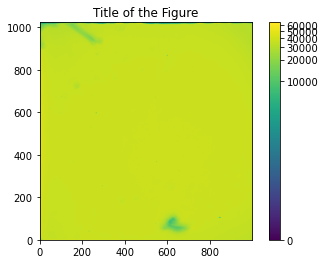

In [16]:
hdul = fits.open(linearity_paths[12])
#hdul.info()
image = hdul[0].data
overscan_region = image[:,1030:]

median_bias = np.median(overscan_region)
image = image - median_bias

norm = simple_norm(image,'log', percent=100)
fig, ax = plt.subplots()
ax.set_title("Title of the Figure")
im = ax.imshow(image[:,:1000] , norm=norm , origin="lower", cmap="viridis")
fig.colorbar(im, ax=ax)

### 4.3.4 Sensitivity

In [17]:
sensitivity_paths_1 = glob("./SensitivityMeasurements/sensitivity_I_1*.fits")
sensitivity_paths_2 = glob("./SensitivityMeasurements/sensitivity_I_2*.fits")

Readout noise: 382.1444246744006


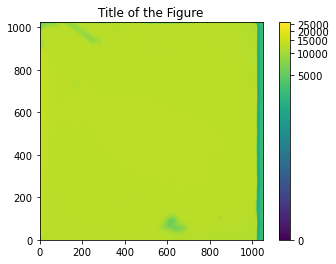

In [25]:
hdul = fits.open(sensitivity_paths_1[4])
image = hdul[0].data

overscan_region = image[:,1030:]
read_out_noise = np.std(overscan_region)
print('Readout noise:', read_out_noise)

norm = simple_norm(image,'log', percent=100)
fig, ax = plt.subplots()
ax.set_title("Title of the Figure")
im = ax.imshow(image[:,:] , norm=norm , origin="lower", cmap="viridis")
fig.colorbar(im, ax=ax)

380.7328305449052


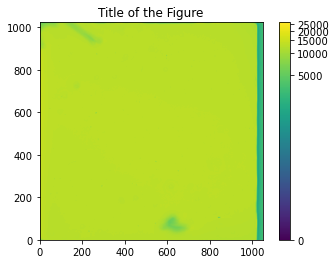

In [26]:
hdul = fits.open(sensitivity_paths_2[4])
image = hdul[0].data

overscan_region = image[:,1030:]
read_out_noise = np.std(overscan_region)
print(read_out_noise)

norm = simple_norm(image,'log', percent=100)
fig, ax = plt.subplots()
ax.set_title("Title of the Figure")
im = ax.imshow(image[:,:] , norm=norm , origin="lower", cmap="viridis")
fig.colorbar(im, ax=ax)

(200, 200)
Total noise: 110.09154052877996
Median Signal 13235.0


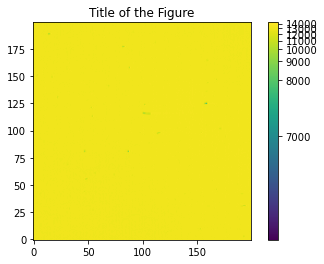

In [27]:
# choose uniformily illuminated area
hdul = fits.open(sensitivity_paths_1[4])
image = hdul[0].data

image_uni_1 = image[400:600,400:600]
print(image_uni_1.shape)

norm = simple_norm(image_uni_1,'log', percent=100)
fig, ax = plt.subplots()
ax.set_title("Title of the Figure")
im = ax.imshow(image_uni_1[:,:] , norm=norm , origin="lower", cmap="viridis")
fig.colorbar(im, ax=ax)

noise_tot_1 = np.std(image_uni_1)
median_sig_1 = np.median(image_uni_1)

print("Total noise:",noise_tot_1)
print("Median Signal", median_sig_1)

(200, 200)
Total noise: 110.55846489843056
Median Signal 13237.0


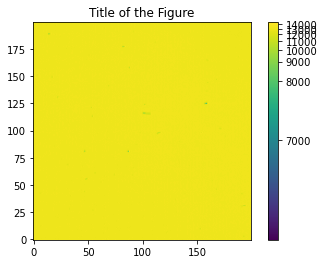

In [28]:
hdul = fits.open(sensitivity_paths_2[4])
image = hdul[0].data

image_uni_2 = image[400:600,400:600]
print(image_uni_2.shape)

norm = simple_norm(image_uni_2,'log', percent=100)
fig, ax = plt.subplots()
ax.set_title("Title of the Figure")
im = ax.imshow(image_uni_2[:,:] , norm=norm , origin="lower", cmap="viridis")
fig.colorbar(im, ax=ax)

noise_tot_2 = np.std(image_uni_2)
median_sig_2 = np.median(image_uni_2)

print("Total noise:",noise_tot_2)
print("Median Signal", median_sig_2)

Noise diff: 75.650498574018


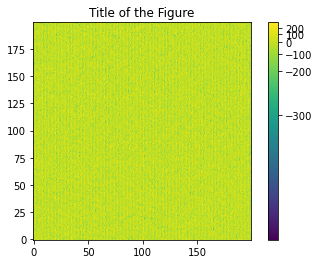

In [29]:
image_uni_1 = image_uni_1.astype('float64')
image_uni_2 = image_uni_2.astype('float64')

image_diff = image_uni_1 - image_uni_2

norm = simple_norm(image_diff,'log', percent=100)
fig, ax = plt.subplots()
ax.set_title("Title of the Figure")
im = ax.imshow(image_diff[:,:] , norm=norm , origin="lower", cmap="viridis")
fig.colorbar(im, ax=ax)

noise_diff = np.std(image_diff)
print('Noise diff:', noise_diff)

In [30]:
for i in range(len(sensitivity_paths_1)):
    hdul1 = fits.open(sensitivity_paths_1[i])
    image1 = hdul1[0].data
    
    hdul2 = fits.open(sensitivity_paths_2[i])
    image2 = hdul2[0].data
    
    median_sig = (np.median(image1[400:600,400:600]) + np.median(image2[400:600,400:600]))/2
    print("Images", i, "Median sig:", median_sig)
    
    image1fl = image1.astype('float64')
    image2fl = image2.astype('float64')
    
    imagediff = image1fl - image2fl
    
    noisediff = np.std(imagediff)
    print('Noise diff:', noisediff)

Images 0 Median sig: 5200.0
Noise diff: 33.52583962094568
Images 1 Median sig: 7043.0
Noise diff: 57.4274441637053
Images 2 Median sig: 9201.5
Noise diff: 50.825254902575736
Images 3 Median sig: 11061.5
Noise diff: 57.27406111792067
Images 4 Median sig: 13236.0
Noise diff: 74.55926366816362
Images 5 Median sig: 15107.5
Noise diff: 78.84222841939018
Images 6 Median sig: 16981.0
Noise diff: 73.1100318467419
Images 7 Median sig: 19180.0
Noise diff: 77.01587910212137
Images 8 Median sig: 21064.0
Noise diff: 87.52572238244984
Images 9 Median sig: 23272.5
Noise diff: 86.8758246393024
Images 10 Median sig: 25170.0
Noise diff: 85.36315838273997
Images 11 Median sig: 27070.5
Noise diff: 74.60157192172029
Images 12 Median sig: 29296.0
Noise diff: 74.07611811936182
Images 13 Median sig: 31167.0
Noise diff: 87.0612139959071
Images 14 Median sig: 33415.0
Noise diff: 81.87942312547247
Images 15 Median sig: 35338.5
Noise diff: 82.52787952466822
Images 16 Median sig: 37570.5
Noise diff: 81.53129230825